In [2]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np

# Arrangement of Plots in a grid layout including horizontal and vertical span

## Simple grid layout
The easiest way is to use `plt.subplots(rows,columns)` which gives you a grid on which you can plot.

In [7]:
axes.shape

(2, 3)

In `axes`, you get a `rows x cols` array of axis, on which you can directly plot.

Text(0.5, 1.0, 'Bottom center')

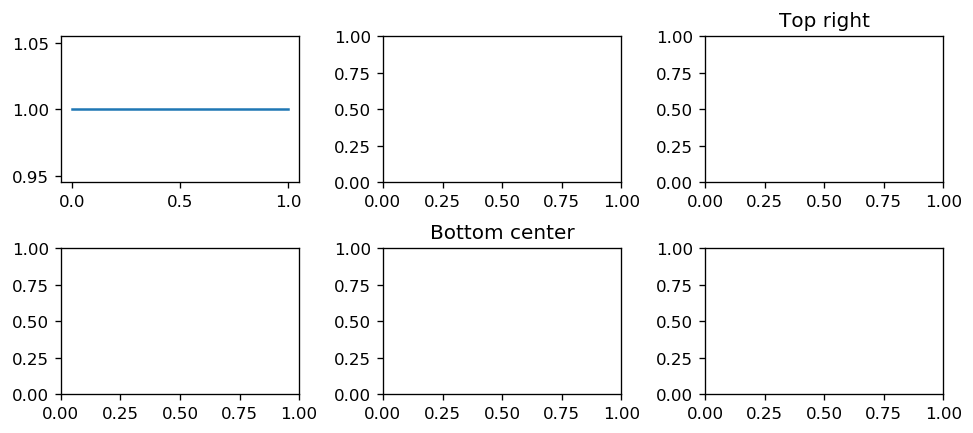

In [8]:
fig,axes = plt.subplots(2,3)
axes[0][0].plot([0,1],[1,1])
axes[0][2].set_title("Top right")
axes[1][1].set_title("Bottom center")

## Advanced grid layout with spans
If you want to arrange a number of plots with different size in a grid, you first define a `GridSpec` and add the relevant subplots. If you want a plot to span over several rows or columns, you can simply use the slice notation e.g. `[0:2,1]` as you know from `numpy`.

In [9]:
import matplotlib.gridspec as gridspec

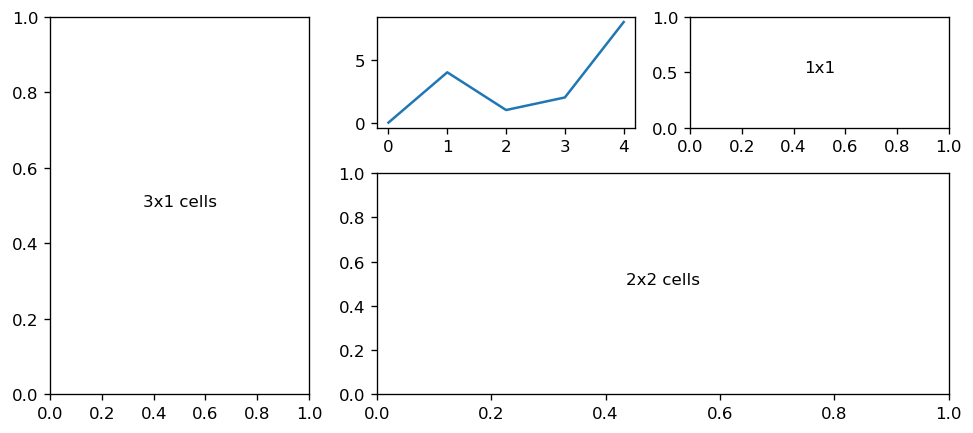

In [36]:
fig = plt.figure()
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[1:, 1:])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[0,2])

ax1.text(0.5,0.5,"3x1 cells",horizontalalignment='center')
ax2.text(0.5,0.5,"2x2 cells",horizontalalignment='center')
ax4.text(0.5,0.5,"1x1",horizontalalignment='center')
ax3.plot([0,4,1,2,8])

Please mind that the area is divided into equal spaces for each plot (including all axes and labels), which means that spanned plots seem larger, because they only require the space for the axes once.

If you want to fine-tune the plot layouts, you can use `width_ratios`  and `height_ratios` to define ratios in x and y direction. As these are only ratios, the absolute numbers do not matter.

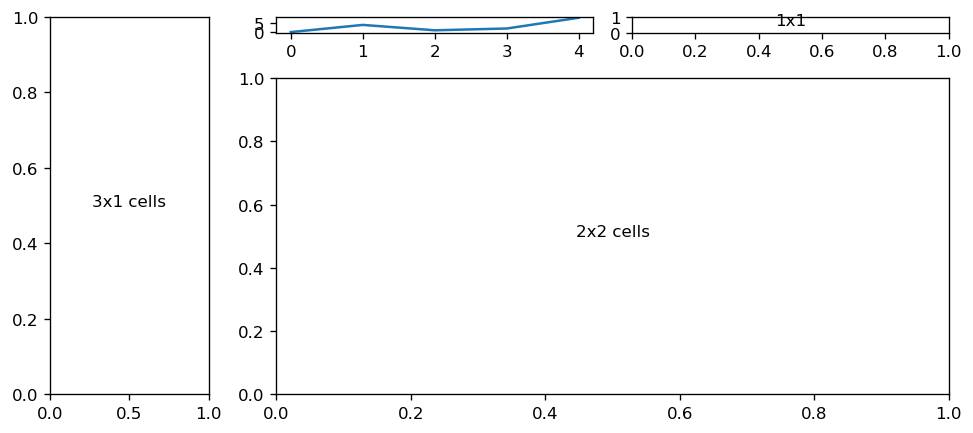

In [46]:
fig = plt.figure()
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig, height_ratios=(10,100,100),width_ratios=(5,10,10))

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[1:, 1:])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[0,2])

ax1.text(0.5,0.5,"3x1 cells",horizontalalignment='center')
ax2.text(0.5,0.5,"2x2 cells",horizontalalignment='center')
ax4.text(0.5,0.5,"1x1",horizontalalignment='center')
ax3.plot([0,4,1,2,8])

## Labeling subfigures

It's really easy to add labels to your subplots by using `axis.text(x,y,"label")`. Here, `x` and `y` are in data units. Instead of figuring out the individual `xy` points for each plot, you can use `transform=ax.transAxes` as an argument, which makes `x` and `y` relative to the data window, where `(0,0)` is the left bottom point and `(1,1)` the right top. Since the drawing area can be substantially different for different subplots, you should not use someting like `(0.02,0.98)` to create some spacing around the text (because the spacing then depends on the plot size). 

Instead, we make a transformation with `transforms.ScaledTranslation(.04,-.04,scale_trans=fig.dpi_scale_trans)` which translates the location by 0.04 inches, which is an equal distance on all subplots.

In [118]:
import matplotlib.transforms as transforms

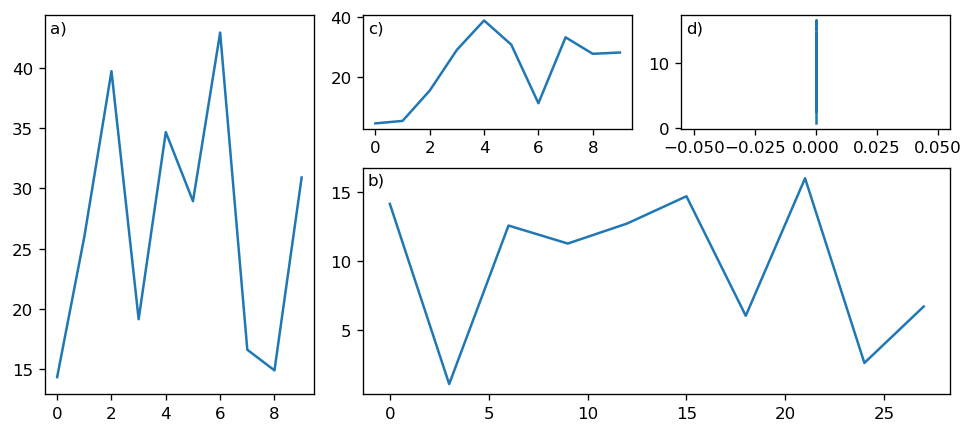

In [149]:
fig = plt.figure()
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[1:, 1:])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[0,2])
axes = [ax1,ax2,ax3,ax4]
[ax.plot(np.arange(10)*np.random.randint(5),np.random.rand(10)*np.random.randint(50)) for ax in axes]

tf = transforms.ScaledTranslation(.04,-.04,scale_trans=fig.dpi_scale_trans) # shift in inches

labels = ["a)","b)","c)","d)"]
for i,ax in enumerate(axes):
    ax.text(0,1, labels[i], horizontalalignment='left',verticalalignment='top', transform=ax.transAxes+tf)